In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report

In [3]:
# Load training and testing data
train_data = pd.read_csv("Titanic_train.csv")
test_data = pd.read_csv("Titanic_test.csv")

In [4]:
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
test_data.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [6]:
train_data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [7]:
test_data.describe()

PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200

In [8]:
# Data Exploration
# a. Examine features and types
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)
print("\nTrain data info:")
print(train_data.info())


Train data shape: (891, 12)
Test data shape: (418, 11)

Train data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


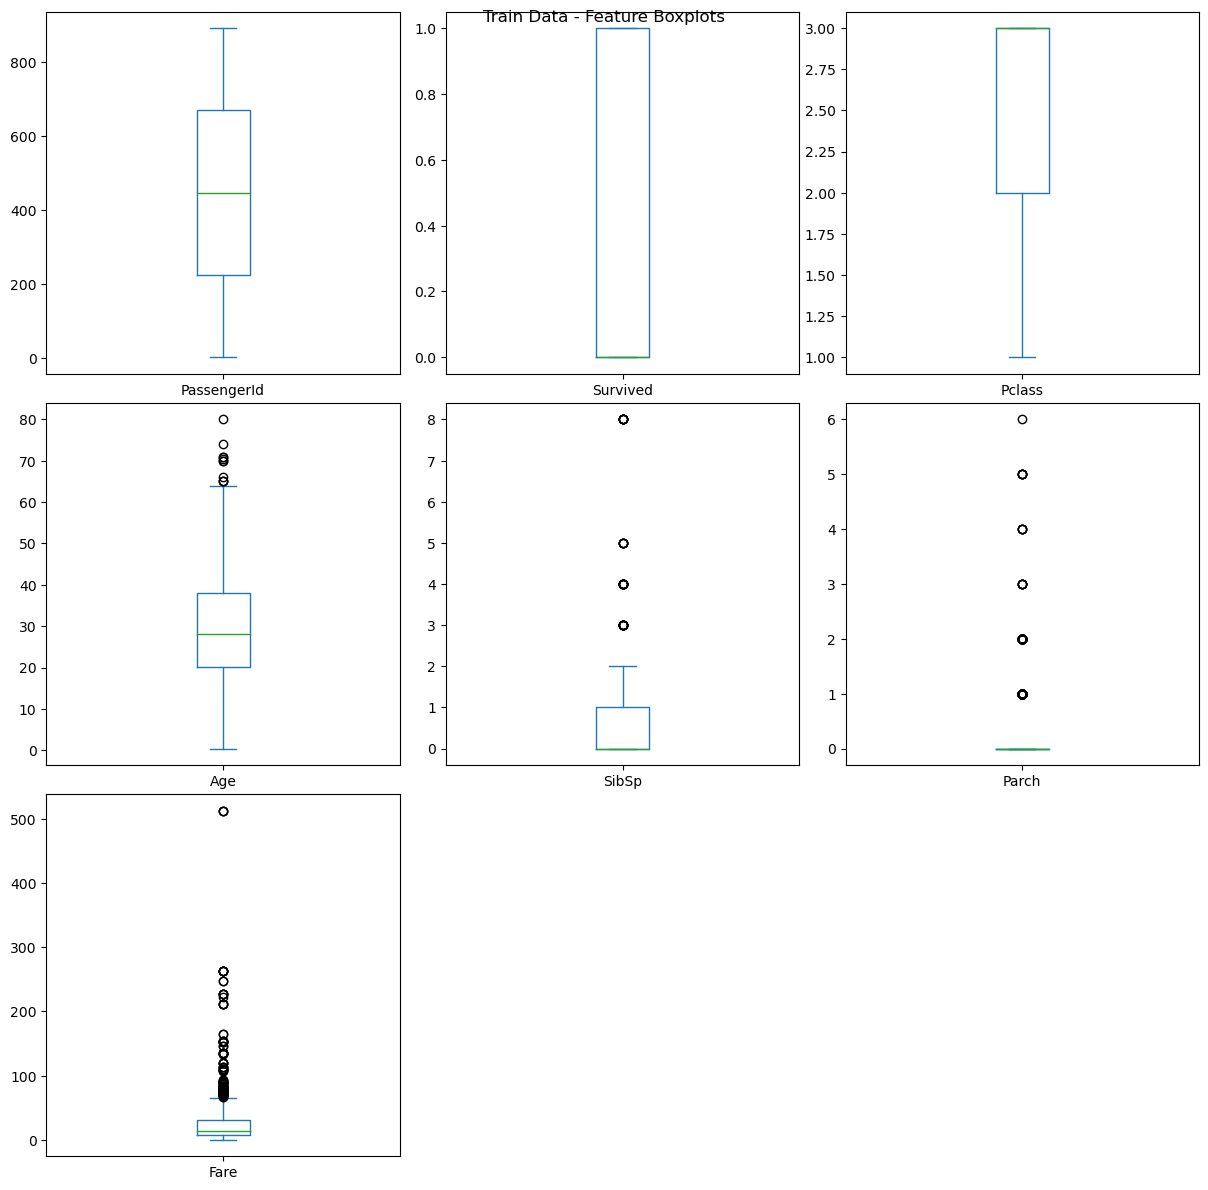

In [9]:
train_data.plot(kind='box', subplots=True, layout=(3, 3), figsize=(12, 12))  # Boxplots for numerical features
plt.suptitle("Train Data - Feature Boxplots")
plt.tight_layout(pad=0.4)
plt.show()

In [10]:
d_numeric = train_data.select_dtypes(include=['number'])
t_numeric = test_data.select_dtypes(include=['number'])

In [11]:
print(d_numeric)

     PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0              1         0       3  22.0      1      0   7.2500
1              2         1       1  38.0      1      0  71.2833
2              3         1       3  26.0      0      0   7.9250
3              4         1       1  35.0      1      0  53.1000
4              5         0       3  35.0      0      0   8.0500
..           ...       ...     ...   ...    ...    ...      ...
886          887         0       2  27.0      0      0  13.0000
887          888         1       1  19.0      0      0  30.0000
888          889         0       3   NaN      1      2  23.4500
889          890         1       1  26.0      0      0  30.0000
890          891         0       3  32.0      0      0   7.7500

[891 rows x 7 columns]


In [12]:
print(t_numeric)

     PassengerId  Pclass   Age  SibSp  Parch      Fare
0            892       3  34.5      0      0    7.8292
1            893       3  47.0      1      0    7.0000
2            894       2  62.0      0      0    9.6875
3            895       3  27.0      0      0    8.6625
4            896       3  22.0      1      1   12.2875
..           ...     ...   ...    ...    ...       ...
413         1305       3   NaN      0      0    8.0500
414         1306       1  39.0      0      0  108.9000
415         1307       3  38.5      0      0    7.2500
416         1308       3   NaN      0      0    8.0500
417         1309       3   NaN      1      1   22.3583

[418 rows x 6 columns]


In [13]:
# Analyze patterns and correlations (e.g., correlation matrix)
correlation = d_numeric.corr()
print("\nCorrelation matrix:")
print(correlation)


Correlation matrix:
             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


In [14]:
print(train_data.isnull().sum(), "\n")

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 



In [15]:
print(test_data.isnull().sum(), "\n")

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64 



In [16]:
 # Handle missing values 

In [17]:
# Impute Age with mean
imputer = SimpleImputer(strategy='mean')
train_data['Age'] = imputer.fit_transform(train_data[['Age']])
test_data['Age'] = imputer.transform(test_data[['Age']])

In [18]:
#impute Fare with mean
imputer_fare = SimpleImputer(strategy='mean')
train_data['Fare'] = imputer_fare.fit_transform(train_data[['Fare']])
test_data['Fare'] = imputer_fare.transform(test_data[['Fare']])


In [19]:
# Fill missing values in 'Embarked' with the most frequent value
imputer_embarked = SimpleImputer(strategy='most_frequent')
train_data['Embarked'] = imputer_embarked.fit_transform(train_data[['Embarked']]).ravel()
test_data['Embarked'] = imputer_embarked.transform(test_data[['Embarked']]).ravel()


In [20]:
# Dropping columns that won't be used (if they exist)
columns_to_drop = ['Name', 'Ticket', 'Cabin']
train_data.drop(columns=[col for col in columns_to_drop if col in train_data.columns], axis=1, inplace=True)
test_data.drop(columns=[col for col in columns_to_drop if col in test_data.columns], axis=1, inplace=True)

In [21]:
print(train_data.isnull().sum(), "\n")

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64 



In [22]:
# Separate features and target variable
X_train = train_data.drop('Survived', axis=1)
y_train = train_data['Survived']
X_test = test_data.copy()


In [23]:
# Define numeric and categorical features
numeric_features = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']
categorical_features = ['Sex', 'Embarked']

In [24]:
# Encoding categorical variables and standardizing numerical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ],
    remainder='passthrough'
)

In [25]:
 # Fit and transform the training data
X_train = preprocessor.fit_transform(X_train)

In [26]:
# Transform the test data
X_test = preprocessor.transform(X_test)

In [27]:
# Model Building
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\vinit\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
# Model Evaluation
y_pred_train = model.predict(X_train)

In [29]:
# Note: We can't evaluate on test set without true labels, so we'll use train set for evaluation here
print("Training Accuracy: ", accuracy_score(y_train, y_pred_train))
print("Precision: ", precision_score(y_train, y_pred_train))
print("Recall: ", recall_score(y_train, y_pred_train))
print("F1-Score: ", f1_score(y_train, y_pred_train))
print("ROC-AUC Score: ", roc_auc_score(y_train, y_pred_train))

Training Accuracy:  0.8058361391694725
Precision:  0.7734627831715211
Recall:  0.6988304093567251
F1-Score:  0.7342549923195083
ROC-AUC Score:  0.7856629278113315


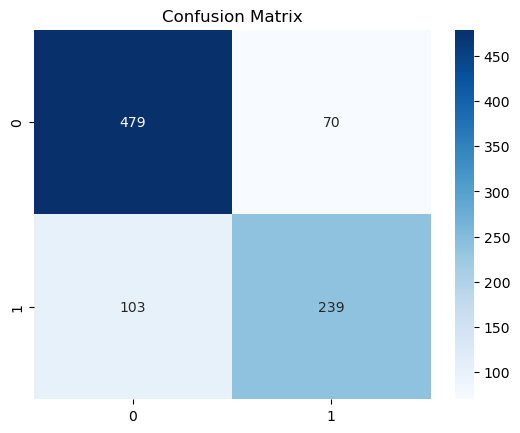

In [30]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_train, y_pred_train)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

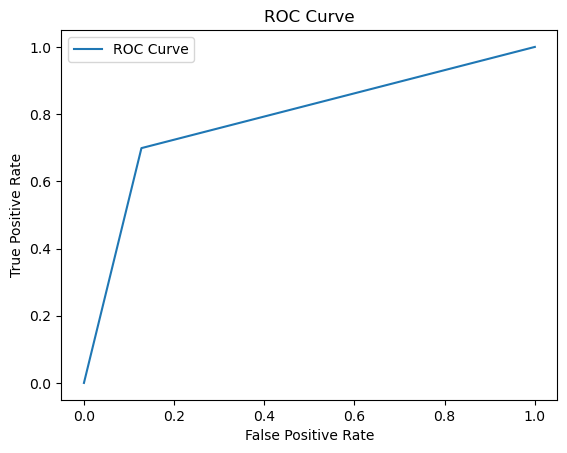

In [31]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_train, y_pred_train)
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [32]:
# Classification Report
print(classification_report(y_train, y_pred_train))


              precision    recall  f1-score   support

           0       0.82      0.87      0.85       549
           1       0.77      0.70      0.73       342

    accuracy                           0.81       891
   macro avg       0.80      0.79      0.79       891
weighted avg       0.80      0.81      0.80       891



In [33]:
# Interpretation
coefficients = pd.DataFrame(model.coef_[0], index=preprocessor.get_feature_names_out(), columns=['Coefficient'])
print("Coefficients:\n", coefficients)


Coefficients:
                         Coefficient
num__Age                  -0.489019
num__Fare                  0.159215
num__Pclass               -0.873097
num__SibSp                -0.349396
num__Parch                -0.075273
cat__Sex_male             -2.614013
cat__Embarked_Q            0.341988
cat__Embarked_S           -0.222451
remainder__PassengerId     0.000155


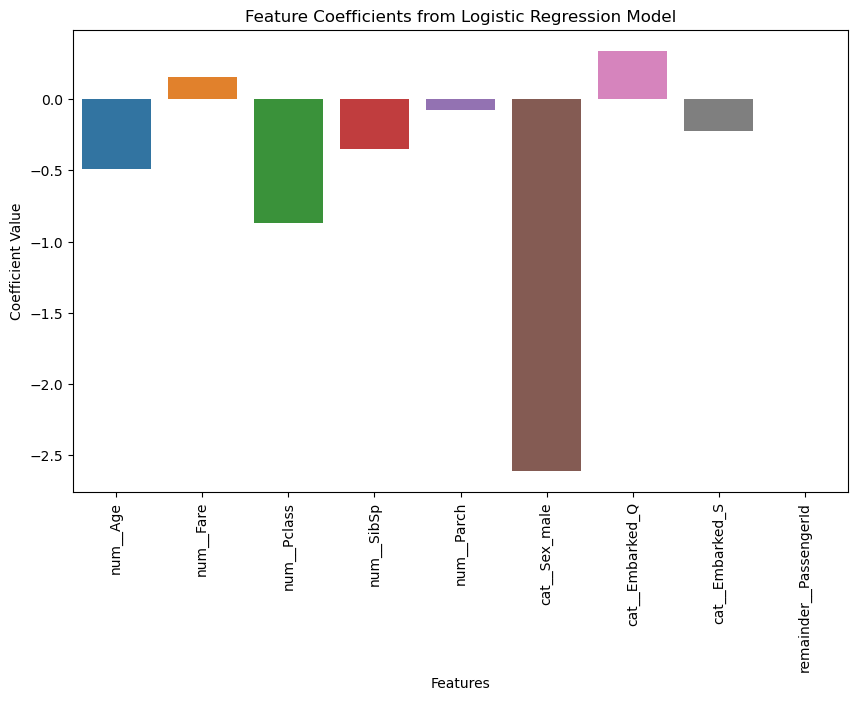

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients.index, y=coefficients['Coefficient'])
plt.xticks(rotation=90)
plt.title("Feature Coefficients from Logistic Regression Model")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.show()

In [ ]:
# What is the difference between precision and recall?
"""
-Precision (also called positive predictive value) is the ratio of correctly predicted positive observations 
 to the total predicted positives.
-The answers that are predicted to be positive it confirms how many of them are actually positive.
-Precision = True positive(TP)/True Positives(TP)+False Positives(FP)

-Recall (also called sensitivity or true positive rate) is the ratio of correctly predicted positive observations 
-It shows that how many were correctly predicted as positive?
-Recall = True positive(TP)/True Positives+False Negatives
"""


In [ ]:
# What is cross-validation, and why is it important in binary classification?
""" 
-Cross-validation is a statistical method used to estimate the skill of machine learning models. 
-It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will
 perform in practice.
-In cross-validation, the data is split into multiple subsets, and the model is trained and validated on these subsets.

-Reduces overfitting
-Utilizes data efficiently
-Hyperparameter tuning"""
"""